In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('/kaggle/input/bank-churn/Churn_Modelling.csv')

In [5]:
ds.isnull().sum()  # Check for missing values, even though there are none


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
train = ds.iloc[:8000, :]
test = ds.iloc[8000:, :]
y_train = train['Exited']
X_train = train.drop(columns=['Exited'])
y_test = test['Exited']
X_test = test.drop(columns=['Exited'])

In [7]:
def Drop_columns(x):
    x = x.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
    return x

In [8]:
X_train = Drop_columns(X_train)
X_test = Drop_columns(X_test)

In [9]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
7995,708,France,Female,67,1,0.00,2,0,1,3837.08
7996,717,France,Female,22,5,112465.06,1,1,1,92977.75
7997,465,Germany,Male,24,6,156007.09,1,1,0,191368.37
7998,829,Germany,Male,28,3,132405.52,3,1,0,104889.20


In [10]:
def Scale_All(x):
    # Scale CreditScore
    min_c = x['CreditScore'].min()
    max_c = x['CreditScore'].max()
    x['CreditScore'] = (x['CreditScore'] - min_c) / (max_c - min_c)

    # Scale Age
    min_age = x['Age'].min()
    max_age = x['Age'].max()
    x['Age'] = (x['Age'] - min_age) / (max_age - min_age)

    # Scale Tenure
    min_t = x['Tenure'].min()
    max_t = x['Tenure'].max()
    x['Tenure'] = (x['Tenure'] - min_t) / (max_t - min_t)

    # Scale Balance
    min_b = x['Balance'].min()
    max_b = x['Balance'].max()
    x['Balance'] = (x['Balance'] - min_b) / (max_b - min_b)

    # Scale EstimatedSalary
    min_es = x['EstimatedSalary'].min()
    max_es = x['EstimatedSalary'].max()
    x['EstimatedSalary'] = (x['EstimatedSalary'] - min_es) / (max_es - min_es)

    # Scale NumOfProducts
    min_es = x['NumOfProducts'].min()
    max_es = x['NumOfProducts'].max()
    x['NumOfProducts'] = (x['NumOfProducts'] - min_es) / (max_es - min_es)

    return x


In [11]:
X_train = Scale_All(X_train)
X_test = Scale_All(X_test)

In [12]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400
...,...,...,...,...,...,...,...,...,...,...
7995,0.716,France,Female,0.662162,0.1,0.000000,0.333333,0,1,0.019129
7996,0.734,France,Female,0.054054,0.5,0.448250,0.000000,1,1,0.464875
7997,0.230,Germany,Male,0.081081,0.6,0.621795,0.000000,1,0,0.956875
7998,0.958,Germany,Male,0.135135,0.3,0.527726,0.666667,1,0,0.524438


In [13]:
def change_data_type(x):
    x['HasCrCard'] = x['HasCrCard'].astype(float)
    x['IsActiveMember'] = x['IsActiveMember'].astype(float)
    return x

In [14]:
X_train = change_data_type(X_train)
X_test = change_data_type(X_test)

In [15]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400
...,...,...,...,...,...,...,...,...,...,...
7995,0.716,France,Female,0.662162,0.1,0.000000,0.333333,0.0,1.0,0.019129
7996,0.734,France,Female,0.054054,0.5,0.448250,0.000000,1.0,1.0,0.464875
7997,0.230,Germany,Male,0.081081,0.6,0.621795,0.000000,1.0,0.0,0.956875
7998,0.958,Germany,Male,0.135135,0.3,0.527726,0.666667,1.0,0.0,0.524438


In [16]:
def One_Hot(x):
    x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=False, dtype='float')
    return x

In [17]:
X_train = One_Hot(X_train)
X_test = One_Hot(X_test)

In [18]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.716,0.662162,0.1,0.000000,0.333333,0.0,1.0,0.019129,1.0,0.0,0.0,1.0,0.0
7996,0.734,0.054054,0.5,0.448250,0.000000,1.0,1.0,0.464875,1.0,0.0,0.0,1.0,0.0
7997,0.230,0.081081,0.6,0.621795,0.000000,1.0,0.0,0.956875,0.0,1.0,0.0,0.0,1.0
7998,0.958,0.135135,0.3,0.527726,0.666667,1.0,0.0,0.524438,0.0,1.0,0.0,0.0,1.0


In [19]:
# Main Change Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [20]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

**Previous step took some 30-35 seconds**

In [21]:
print("Best hyperparameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score: 0.8442500000000001
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [22]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [23]:
y_pred = best_model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with optimized Decision Tree:", accuracy)

Test Accuracy with optimized Decision Tree: 0.827


**Improvement has been made**

In [25]:
feature_importances = best_model.feature_importances_
features = X_train.columns
feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

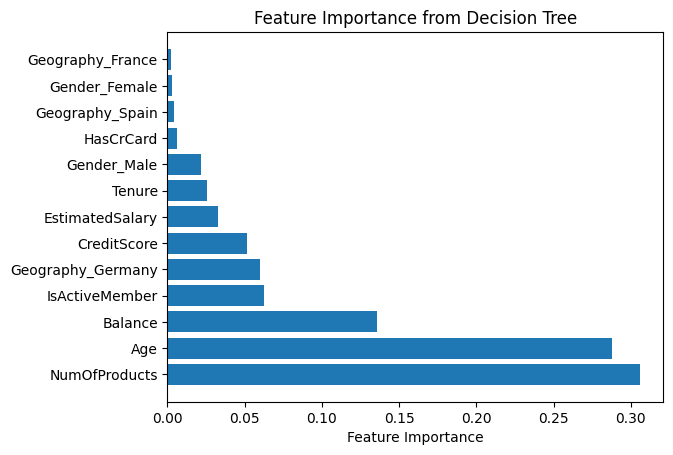

In [26]:
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()

Gerography_Germany is far away from its counterparts, there could be a pattern

In [41]:
stay=ds[ds['Geography'] == 'Germany']['Exited'].value_counts()[0]
exitted=ds[ds['Geography'] == 'Germany']['Exited'].value_counts()[1]

In [47]:
print(stay, "people stay and ", exitted, " people leave")
print((exitted*100)/(stay+exitted), "% of germans leave the bank")

1695 people stay and  814  people leave
32.44320446392985 % of germans leave the bank


In [48]:
stay=ds[ds['Geography'] == 'France']['Exited'].value_counts()[0]
exitted=ds[ds['Geography'] == 'France']['Exited'].value_counts()[1]

In [49]:
print(stay, "people stay and ", exitted, " people leave")
print((exitted*100)/(stay+exitted), "% of french people leave the bank")

4204 people stay and  810  people leave
16.15476665337056 % of french people leave the bank


In [50]:
stay=ds[ds['Geography'] == 'Spain']['Exited'].value_counts()[0]
exitted=ds[ds['Geography'] == 'Spain']['Exited'].value_counts()[1]

In [51]:
print(stay, "people stay and ", exitted, " people leave")
print((exitted*100)/(stay+exitted), "% of Spaniards leave the bank")

2064 people stay and  413  people leave
16.67339523617279 % of Spaniards leave the bank


# clear big observation

The bank can retain its German customers/clients with a lesser efficiency compared to its Spanish and French clients. Almost twice the amount of germans leave the bank compared to their spanish and french counterparts

# we can also see that age is a big factor

In [52]:
ds['Age'].min(),ds['Age'].max()

(18, 92)

In [57]:
ds[ds['Exited'] == 1]['Age'].mean()

44.8379970544919

In [58]:
ds[ds['Exited'] == 0]['Age'].mean()

37.40838879819164

**The bank is successfully retaining its younger clients but the same cannot be said for customers in their mid 40s and above**

# Lets check for relation with bank balance

In [61]:
ds[ds['Exited']==1]['Balance'].mean()

91108.53933726068

In [62]:
ds[ds['Exited']==0]['Balance'].mean()

72745.2967788522

**People with a higher bank balance are leaving the bank, this is bad news for business as clients with a higher bank balance could potentially give more profits**

# I want to check the relationship with Credit Score too

In [64]:
ds[ds['Exited']==1]['CreditScore'].mean()

645.3514972999509

In [65]:
ds[ds['Exited']==0]['CreditScore'].mean()

651.8531960316463

**Although I don't see a big deciding factor here, still, people with a lower credit score are more prone to leaving the bank**

## Done